In [67]:
import numpy
import networkx

file = open('data/12.txt', 'r')
data = file.read()

file.close()

In [68]:
start, end = 0, 0
starts = []
map = []

position = 0

for line in data.splitlines():
    map.append([])

    for char in line:
        match char:
            case 'a':
                starts.append(position)
            case 'S':
                start = position
                starts.append(position)
                char = 'a'
            case 'E':
                end = position
                char = 'z'
        
        map[-1].append(ord(char) - ord('a'))
        position += 1


In [69]:
G = networkx.DiGraph()
map = numpy.array(map)
h, w = map.shape

def get_position(y, x):
    return x + y * w

for i in range(h):
    for j in range(w):
        if i + 1 < h:
            edge = [get_position(i, j), get_position(i + 1, j)]
            
            distance = map[i + 1, j] - map[i, j]

            if distance <= 1:
                G.add_edge(*edge)

            distance = -distance

            if distance <= 1:
                G.add_edge(*reversed(edge))

        if j + 1 < w:
            edge = [get_position(i, j), get_position(i, j + 1)]
            distance = map[i, j + 1] - map[i, j]

            if distance <= 1:
                G.add_edge(*edge)

            distance = -distance

            if distance <= 1:
                G.add_edge(*reversed(edge))

# Star 1

In [70]:
path = networkx.shortest_path(G, start, end)

len(path) - 1

456

# Path visualization

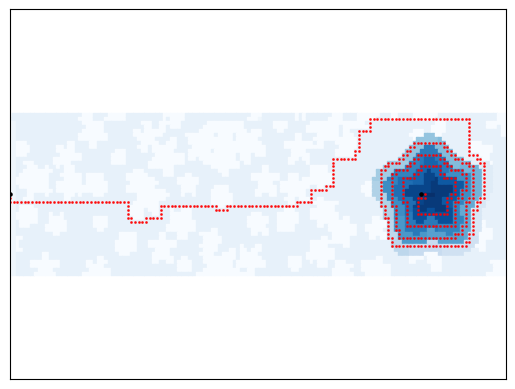

In [71]:
import matplotlib.pyplot as pyplot

pos = {}
margins=[0, 2/3]

for i in range(h):
    for j in range(w):
        pos[get_position(i, j)] = [j, -i]

# Map
networkx.draw_networkx_nodes(G, pos, node_color=map, node_size=5, node_shape='s', margins=margins,cmap=pyplot.cm.Blues)

# Path
networkx.draw_networkx_nodes(G, pos, nodelist=path, node_color="#ff0000", node_size=4, node_shape='.', margins=margins, alpha=0.8)

# Start and end
networkx.draw_networkx_nodes(G, pos, nodelist=[start, end], node_color='#000', node_size=5, node_shape='o', margins=margins)

# Star 2

In [72]:
lens = []

for s in starts:
    try:
        path = networkx.shortest_path(G, s, end)
        lens.append(len(path) - 1)
    except:
        # No path to the end
        pass

min(lens)

454